# Importing the dataset

In [28]:
import pandas as pd


train_data = pd.read_csv("../raw_data/dataemnist/emnist-byclass-train.csv")

test_data = pd.read_csv("../raw_data/dataemnist/emnist-byclass-test.csv")

mapp = pd.read_csv("../raw_data/dataemnist/emnist-byclass-mapping.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)





In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing 

In [29]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

In [30]:
X_train.shape

(697931, 784)

In [31]:
test_data.shape

(116322, 785)

In [32]:
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

In [33]:
del train_data
del test_data

## Converting to a numpy array

In [34]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [35]:
X_train = np.asarray(X_train)
X_train = np.apply_along_axis(rotate, 1, X_train)
print ("X_train:",X_train.shape)

X_train: (697931, 28, 28)


In [36]:
X_test = np.asarray(X_test)
X_test = np.apply_along_axis(rotate, 1, X_test)
print ("X_test:",X_test.shape)

X_test: (116322, 28, 28)


(116322, 784)

## reshape

## plotting

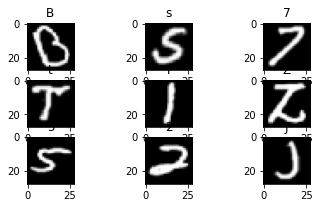

In [37]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(chr(mapp[y_train[i]]))

## Normalizing


In [38]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Expanding the data

In [39]:
from tensorflow.keras.backend import expand_dims
import tensorflow as tf
X_train = tf.keras.backend.expand_dims(X_train, axis=-1)
X_test = tf.keras.backend.expand_dims(X_test, axis=-1)

## To categorical

In [40]:
from tensorflow.keras.utils import to_categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=62)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=62)

## Building a model

In [51]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

#def initialize_model():
model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=62, activation = 'softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    #return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [52]:
model.fit(X_train, y_train_cat, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

Epoch 1/10
21811/21811 [==============================] - 94s 4ms/step - loss: 0.5660 - accuracy: 0.8102
Epoch 2/10
21811/21811 [==============================] - 95s 4ms/step - loss: 0.4216 - accuracy: 0.8483
Epoch 3/10
21811/21811 [==============================] - 98s 4ms/step - loss: 0.3956 - accuracy: 0.8555
Epoch 4/10
21811/21811 [==============================] - 94s 4ms/step - loss: 0.3811 - accuracy: 0.8598
Epoch 5/10
21811/21811 [==============================] - 98s 4ms/step - loss: 0.3721 - accuracy: 0.8622
Epoch 6/10
21811/21811 [==============================] - 98s 4ms/step - loss: 0.3659 - accuracy: 0.8641
Epoch 7/10
21811/21811 [==============================] - 98s 4ms/step - loss: 0.3606 - accuracy: 0.8656
Epoch 8/10
21811/21811 [==============================] - 94s 4ms/step - loss: 0.3562 - accuracy: 0.8667
Epoch 9/10
21811/21811 [==============================] - 99s 5ms/step - loss: 0.3531 - accuracy: 0.8674
Epoch 10/10
21811/21811 [==============================

In [53]:
print(model.evaluate(X_test, y_test_cat, verbose=0))


[0.3746280074119568, 0.8626399040222168]
